In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [38]:
cas = ts(preprocessing('E:/london/original-clf/london_casual.csv', 'E:/london/original-clf/london_total.csv', thres=0)$series[(24*16):(24*30)], frequency=24)
tot = ts(preprocessing('E:/london/original-clf/london_casual.csv', 'E:/london/original-clf/london_total.csv', thres=0)$total[(24*16):(24*30)], frequency=24)
perc = cas/tot

integer(0)
integer(0)


Total tweets from London starting mid-August to early September. We look at the 2 week period from August 16 to August 30. This is not as consistent as the 20x sample size from the US which makes things messy later.

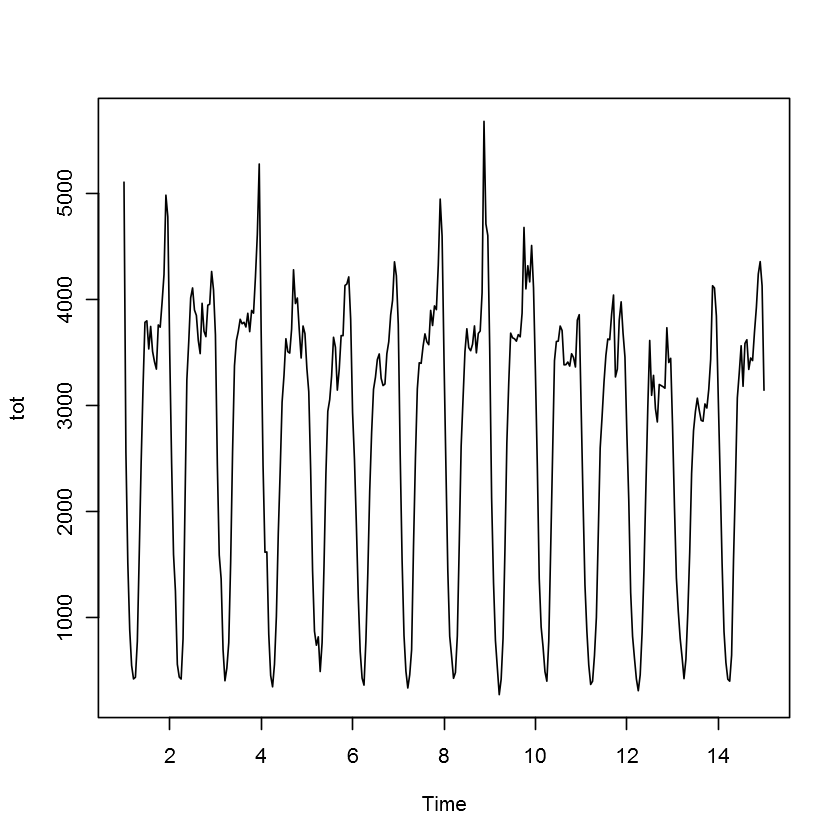

In [39]:
plot(tot)

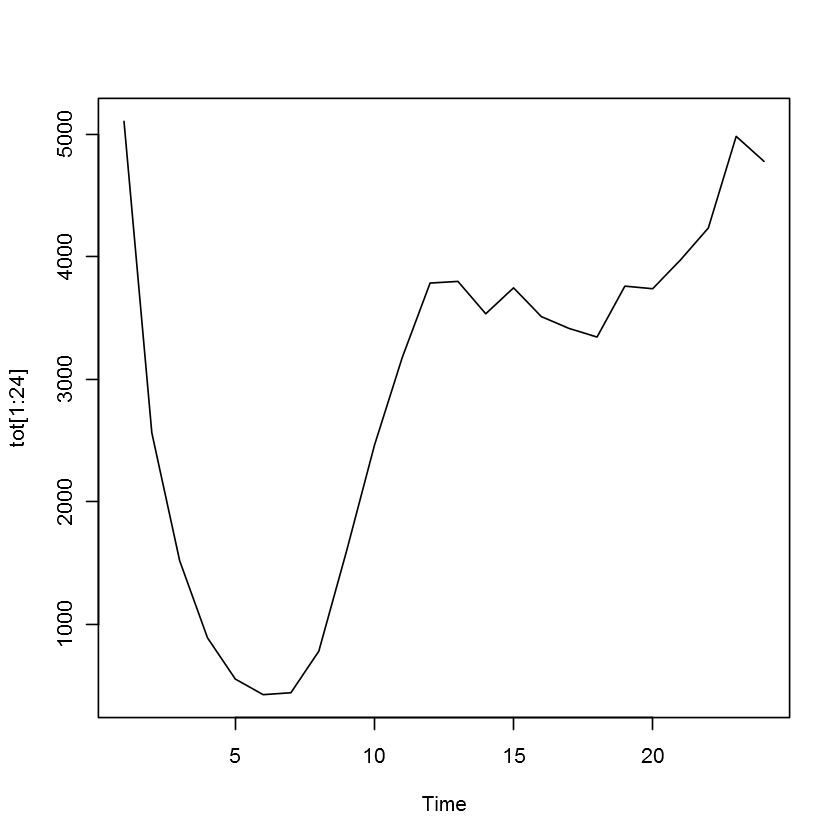

In [40]:
plot.ts(tot[1:24])

First Person Currently drinking starting from 12am London local (by hour over 2 weeks, Starting Tuesday Aug 16):

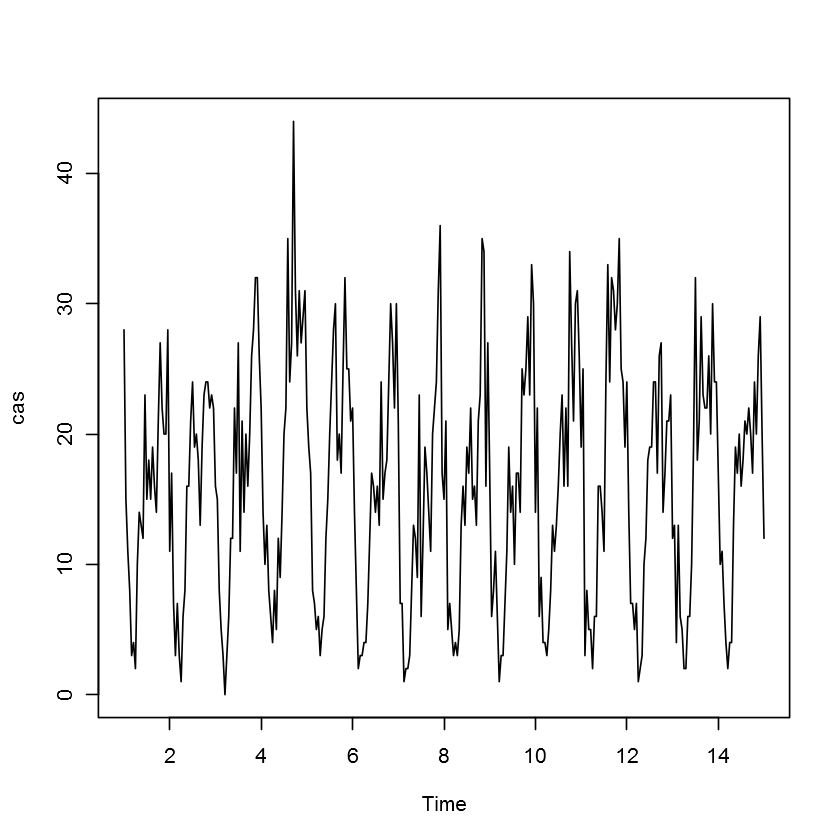

In [41]:
plot(cas)

These numbers are mjuch smaller than what we were previously working with. Percentage tweets:

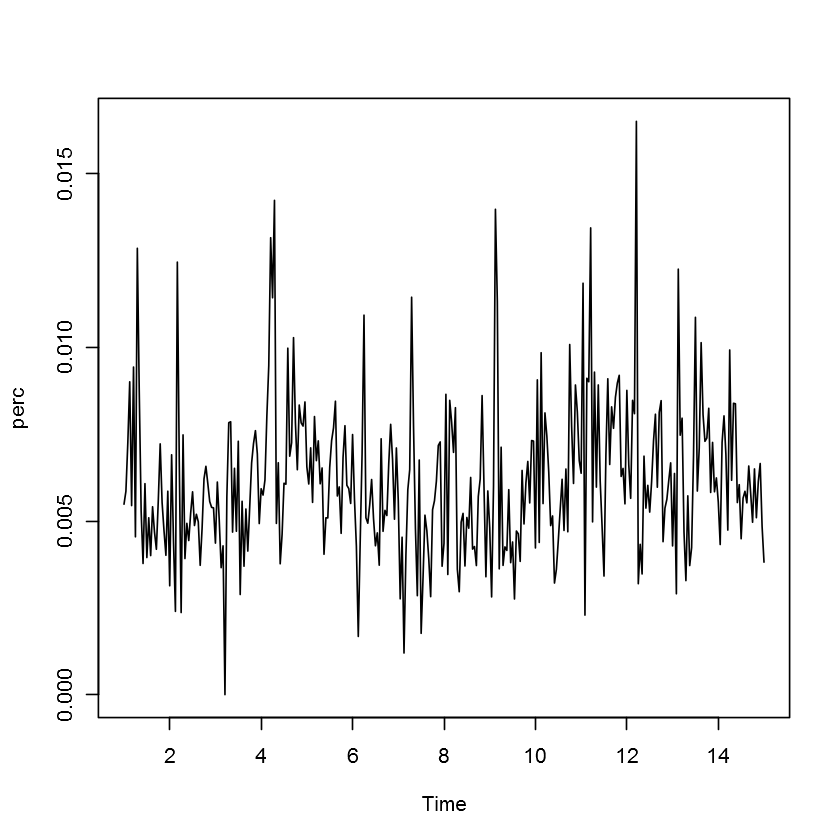

In [42]:
plot(perc)

This is super noisy, in comparison to the June/USA data, my guess due to the small sample size and the less consistent total tweet count.

In [53]:
june=june_ts()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [54]:
june_2w = window(june, start=c(1,1), end=c(14, 24))

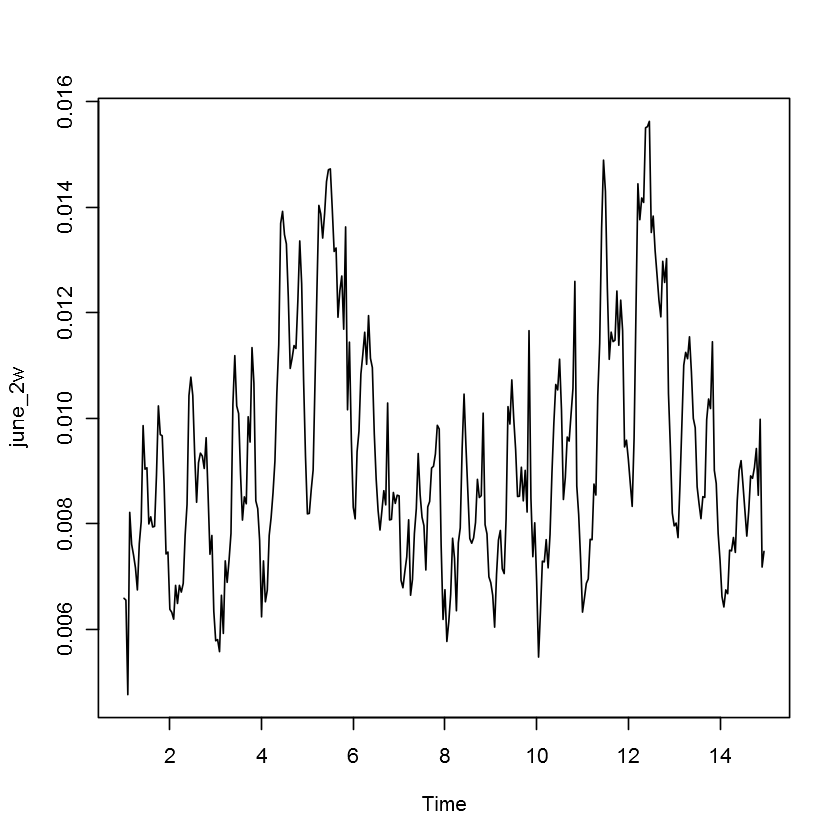

In [60]:
plot.ts(june_2w)

Periodogram of percent casual tweets series. Freq=2 (weekly) and Freq=28 (twice/day) are the most apparent, but not nearly as clear as in June.

In [70]:
freq = (fft(perc)[2:100])

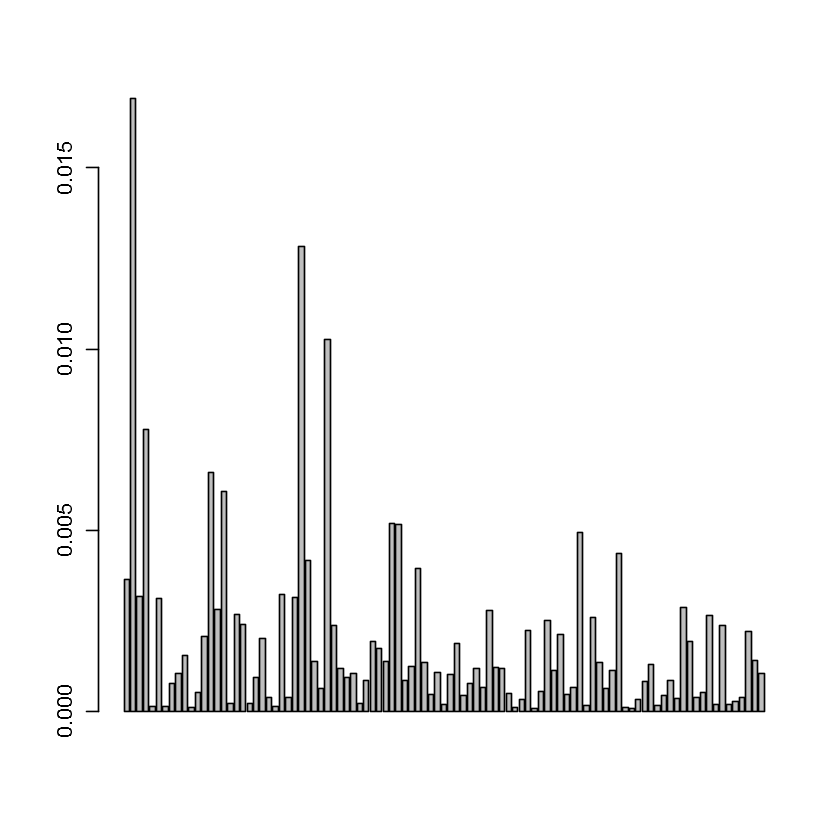

In [71]:
barplot(Mod(freq)^2)

In comparison the Periodogram of 2 weeks in June, the daily component is much clearer.

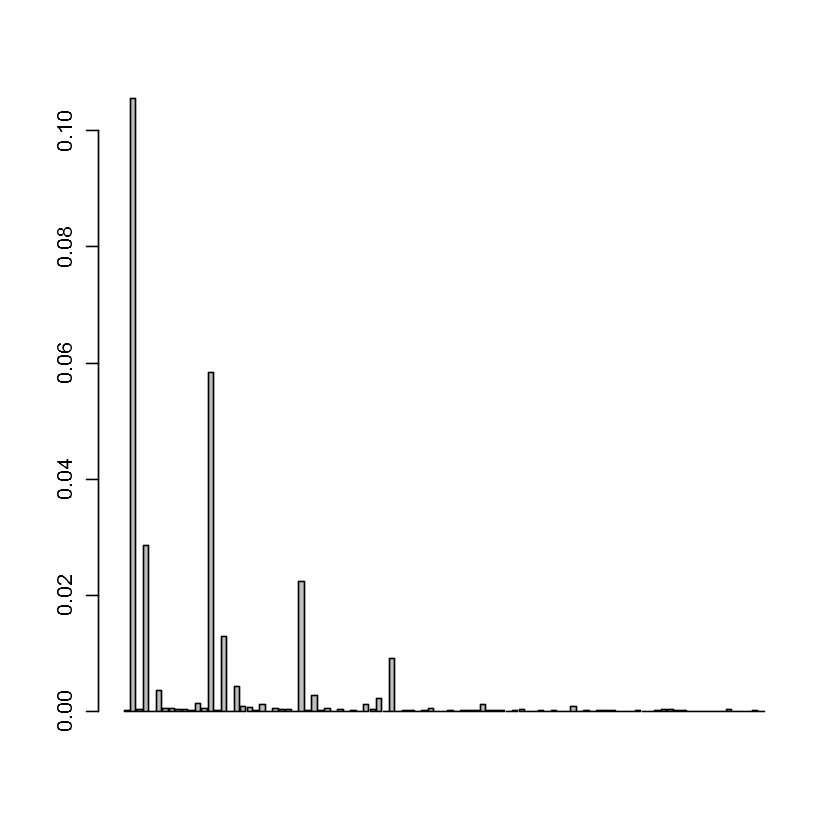

In [72]:
freq = (fft(june_2w)[2:100])
barplot(Mod(freq)^2)

In [51]:
Mod(freq)[14]

[1] 0.08119422

In [52]:
Arg(freq[14])

[1] -0.2996663

In [55]:
Arg(fft(june_2w)[2:200])[14]

[1] 2.781256

In [59]:
phase_dist(14)(june_2w, perc)

[1] 0.490344